## Machine Learning And Data Science - PROJECT WORK

## TEAM 1

### Team Members:
* Arshad
* Ram Karthik
* Vishal

## Problem Statement : Prediciting Car Prices using K-Nearest Neighbours (KNN) Algorithm

* <b><h2>Importing Libraries</b></h2>

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

* <b><h2>Reading DataFile</b></h2>

In [3]:
df=pd.read_csv('DataFiles/cars_data.csv')

* <b><h2>Displaying first 5 Rows</b></h2>

In [4]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h1><u><b>Data Cleaning</b></u></h1>

* <b><h2>Replacing '?' values with 'Nan' in 'normalized_losses'</b></h2>

In [5]:
clean_data=df.replace('?',np.nan)
clean_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


* <b><h2>Filling Nan values with 0</b></h2>

In [6]:
clean_data=clean_data.fillna(0)
clean_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


* <b><h2>Converting 'normalized_losses' to integer type</b></h2>

In [7]:
clean_data["normalized_losses"]=pd.to_numeric(clean_data["normalized_losses"])

In [8]:
type(clean_data.loc[0][1])

numpy.int64

 * <b><h2>Verifying if the column's mean is diplayed or not</b></h2>

In [9]:
clean_data.mean()

symboling               0.752941
normalized_losses      98.027451
wheel_base             99.013725
length                174.563529
width                  65.925490
height                 53.850196
curb_weight          2560.513725
engine_size           126.313725
compression_ratio      10.357333
city_mpg               25.376471
highway_mpg            30.886275
dtype: float64

* <b><h2>Replacing missing values with mean of that Column</b></h2>

In [10]:
clean_data=clean_data.replace(0,clean_data.mean())
clean_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3.0,98.027451,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3.0,98.027451,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1.0,98.027451,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2.0,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2.0,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


* <b><h2>Visualizing Data using Bar Plot</b></h2>

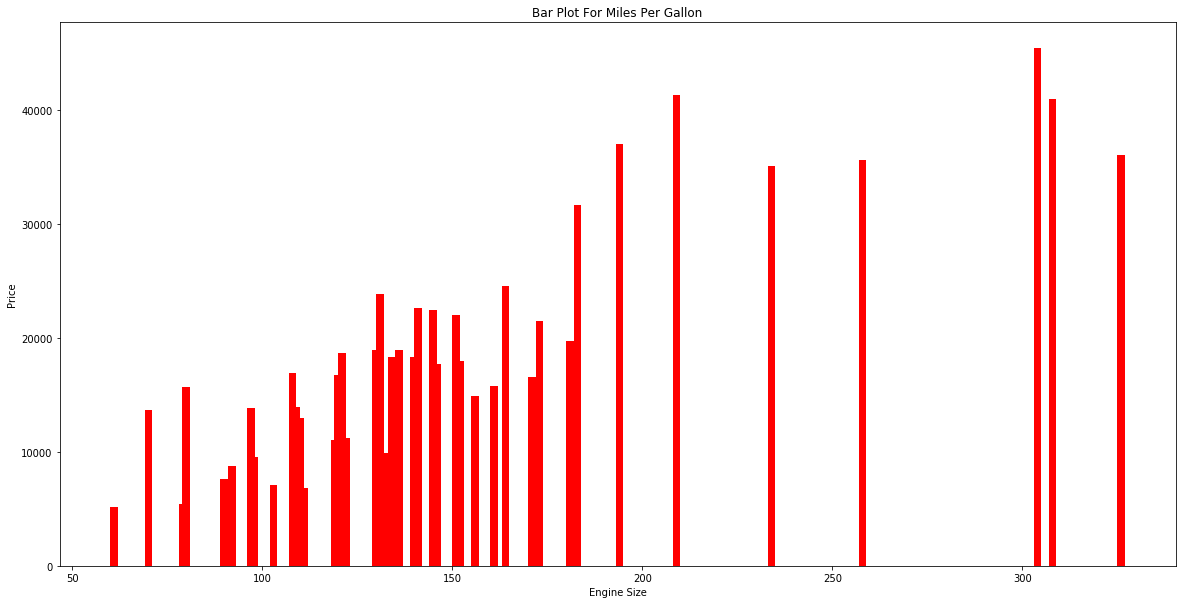

In [11]:
plt.figure(figsize=(20,10))
plt.bar(clean_data.engine_size.astype(int),clean_data.price.astype(int),width=2,color='red')
#plt.figure(figsize=(20,10))
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Bar Plot For Miles Per Gallon")
plt.show()

* <b><h2>Visualizing Data using Histogram</b></h2>

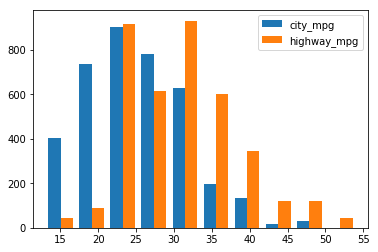

In [12]:
plt.hist([clean_data.city_mpg,clean_data.highway_mpg],label=["city_mpg","highway_mpg"])
plt.legend()
plt.show()


* <b><h2>Assigning Dependent and Target Variables</b></h2>

In [13]:
x=clean_data.loc[:,['normalized_losses','engine_size','horsepower','city_mpg','highway_mpg']]
y=clean_data.loc[:,'price']
type(x)

pandas.core.frame.DataFrame

In [14]:
x=scale(x)
x

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[-0.51542401,  0.09520273,  0.21070599, -0.69124048, -0.57571304],
       [-0.51542401,  0.09520273,  0.21070599, -0.69124048, -0.57571304],
       [-0.51542401,  0.66338076,  1.31036864, -1.00712995, -0.72385313],
       ...,
       [-0.60366623,  1.2057325 ,  0.79889764, -1.16507469, -1.16827339],
       [-0.60366623,  0.48259684,  0.08283824,  0.09848319, -0.57571304],
       [-0.60366623,  0.37929174,  0.28742664, -1.00712995, -0.87199322]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 1)

In [16]:
x=pd.DataFrame(x)
x.head()
#x_train[0].dtypes

,0,1,2,3,4
0,-0.515424,0.095203,0.210706,-0.691240,-0.575713
1,-0.515424,0.095203,0.210706,-0.691240,-0.575713
2,-0.515424,0.663381,1.310369,-1.007130,-0.723853
3,1.407502,-0.447149,-0.019456,-0.217406,-0.131293
4,1.407502,0.250160,0.313000,-1.165075,-1.316413


In [17]:
y_test.head()
#y_test.shape

3279     9989
2793    12290
2027    13845
17      36880
2928     8921
Name: price, dtype: object

* <b><h2>To check if the value is NULL</b></h2>

In [18]:
clean_data.normalized_losses.isnull().sum()

0

In [19]:
clean_data.engine_size.isnull().sum()

0

In [20]:
clean_data.horsepower.isnull().sum()

0

In [21]:
clean_data.city_mpg.isnull().sum()

0

In [22]:
clean_data.price.isnull().sum()

0

In [23]:
#y.astype(int)

In [24]:
#x.astype(int)
type(y_train)
y_train.dtypes
y_train.dtypes

dtype('O')

* <b><h2>Fitting the testing data and training data</b></h2>

In [25]:
model_knn=KNeighborsClassifier(n_neighbors=10,metric='euclidean')
model_knn.fit(x_train.astype(int),y_train.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [26]:
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

* <b><h2>Predicting the prices based on test values</b></h2>

In [27]:
y_predict=model_knn.predict(x_test)
len(y_predict)
y_predict

array([ 8238,  8948,  5399, 36880, 11248, 11248,  7129, 18150, 17199,
        9988, 11549,  5151, 11549,  5399, 16695,  7129,  7295,  5399,
       18399, 36880, 18950,  9538, 11900,  7129,  5399,  5399, 11248,
       13499, 16925,  5399, 17710, 22625, 16695, 16695,  6918, 16695,
        8058,  5399, 15998, 16695,  5399,  5399,  5399, 36880, 13499,
        6938,  8238,  5389, 18950, 41315,  5399,  8238, 13499,  5399,
       11900,  9538,  7295,  7295, 11248,  5348,  5389, 13499,  5399,
        5399,  8558,  5348,  5399,  5399,  5399,  9988,  5389, 13499,
        5389,  5399,  5348,  9980,  5399,  8238,  8238, 13499,  8948,
        5399, 22625,  5399, 11900, 13499,  5399,  5399,  5399,  8238,
        8238,  7295,  9538, 16925,  5389,  9538,  7898,  9988,  9895,
        8238,  8058,  8238,  6918,  7295, 13499,  6938, 18950,  7775,
        7788, 16925, 21485, 11549,  7295,  5399,  8948, 13645,  8558,
        9988, 41315,  5399, 11900,  5399,  7295,  7775,  5399,  9988,
        7898,  5399,

In [28]:
np.mean(y_predict)

11860.891503267974

In [29]:
np.mean(y_test.astype(float))

13338.929411764706

In [30]:
y_test.head()

3279     9989
2793    12290
2027    13845
17      36880
2928     8921
Name: price, dtype: object

In [31]:
(y_predict==y_test)

3279    False
2793    False
2027    False
17      False
2928    False
1316    False
1847    False
372     False
2053    False
3245    False
2489    False
1548    False
1519    False
2582    False
701     False
1673    False
3560    False
632     False
2146    False
1035    False
2751    False
589     False
1281    False
1884    False
393     False
3105    False
551     False
2618    False
420     False
3727    False
        ...  
1903    False
945     False
2158    False
1791    False
2070    False
471     False
1163    False
1579    False
1359    False
2575    False
2871    False
415     False
2031    False
2105    False
1064    False
2008    False
2963    False
544     False
1020    False
1038    False
2434    False
1659     True
1125    False
1624    False
3624    False
223     False
613     False
3134    False
1586    False
1206    False
Name: price, Length: 765, dtype: bool

In [32]:
y_test

3279     9989
2793    12290
2027    13845
17      36880
2928     8921
1316    12945
1847    10245
372     18150
2053    21105
3245     8195
2489    12940
1548     5151
1519    12940
2582     5399
701     13295
1673     9960
3560    13415
632      7609
2146    18399
1035    30760
2751    19045
589      7689
1281    17710
1884     8949
393      5118
3105        0
551     12945
2618    28248
420      9298
3727     7198
        ...  
1903     5572
945     15690
2158     5572
1791    17710
2070     6479
471      9538
1163     9960
1579    36000
1359    14489
2575     6692
2871    18344
415      7738
2031    15985
2105    18280
1064        0
2008     8948
2963     7898
544      7129
1020    13495
1038     5151
2434     7053
1659        0
1125    19699
1624     7299
3624     7395
223      8948
613     13499
3134    45400
1586    11845
1206     8495
Name: price, Length: 765, dtype: object

In [33]:
y_predict

array([ 8238,  8948,  5399, 36880, 11248, 11248,  7129, 18150, 17199,
        9988, 11549,  5151, 11549,  5399, 16695,  7129,  7295,  5399,
       18399, 36880, 18950,  9538, 11900,  7129,  5399,  5399, 11248,
       13499, 16925,  5399, 17710, 22625, 16695, 16695,  6918, 16695,
        8058,  5399, 15998, 16695,  5399,  5399,  5399, 36880, 13499,
        6938,  8238,  5389, 18950, 41315,  5399,  8238, 13499,  5399,
       11900,  9538,  7295,  7295, 11248,  5348,  5389, 13499,  5399,
        5399,  8558,  5348,  5399,  5399,  5399,  9988,  5389, 13499,
        5389,  5399,  5348,  9980,  5399,  8238,  8238, 13499,  8948,
        5399, 22625,  5399, 11900, 13499,  5399,  5399,  5399,  8238,
        8238,  7295,  9538, 16925,  5389,  9538,  7898,  9988,  9895,
        8238,  8058,  8238,  6918,  7295, 13499,  6938, 18950,  7775,
        7788, 16925, 21485, 11549,  7295,  5399,  8948, 13645,  8558,
        9988, 41315,  5399, 11900,  5399,  7295,  7775,  5399,  9988,
        7898,  5399,

* <b><h2>Checking the accuracy score of the model</b></h2>

In [34]:
y_as=y_test.astype(int)
accuracy_score(y_predict,y_as)

0.11764705882352941